<a href="https://colab.research.google.com/github/RizkyPutraKurniawan24/Machine-Learning/blob/master/Supervised%20Learning/Regression/Polynomial%20Regression%20with%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Polynomial Regression**

### **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Dataset**

In [29]:
#Import dataset
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('drive/MyDrive/All Datasets/[Machine Learning Algorithm]/Dataset Supervised Learning (Regression)/Position_Salaries.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Check Dataset**

In [30]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [32]:
df.shape

(10, 3)

In [33]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [34]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

<ipython-input-35-7f8b33bf5e5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap='Reds')


<Axes: >

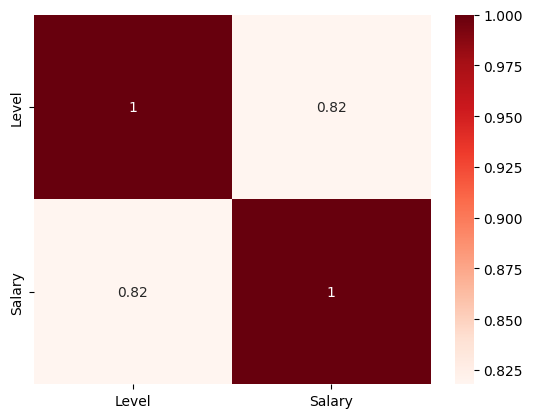

In [35]:
sns.heatmap(df.corr(), annot=True,cmap='Reds')

### **Exploratory Data Analysis (EDA)**

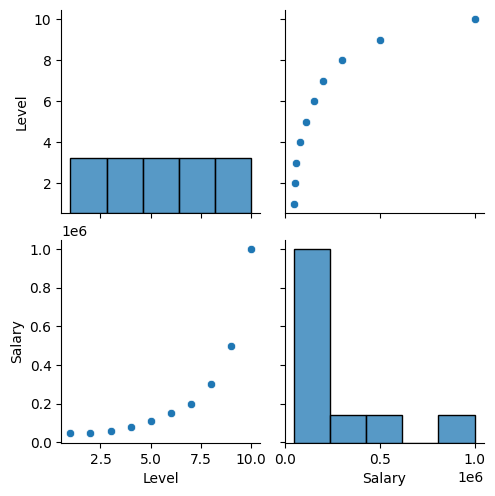

In [36]:
sns.pairplot(df)

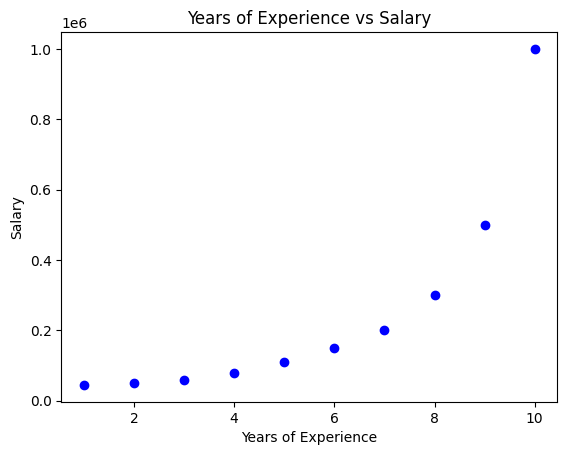

In [54]:
# Visualize the dataset
plt.scatter(X, y, color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### **Data Preparation**

- Split the data into independent variable (X) and dependent variable (y).
- Typically, the independent variable (X) is the features used to predict the dependent variable (y).

In [40]:
X = df.iloc[:, 1:2].values  # Independent variable (Position Level)
y = df.iloc[:, 2].values    # Dependent variable (Salary)

### **Splitting the Data into Training and Testing Sets**

- Split the data into training and testing sets. The training data is used to train the model, while the testing data is used to evaluate the model's performance.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_train.shape

(8, 1)

In [43]:
X_test.shape

(2, 1)

### **K-Fold Cross Validation**

In [45]:
degrees = np.arange(1, 11)  # Degrees of polynomials to try

In [46]:
# Perform k-fold cross-validation for each degree
mean_scores = []
for degree in degrees:
    # Polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Linear regression model
    model = LinearRegression()

    # Cross-validation
    scores = cross_val_score(model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
    mean_scores.append(-scores.mean())

# Find the best degree based on the minimum mean squared error
best_degree = degrees[np.argmin(mean_scores)]
print("Best degree:", best_degree)

Best degree: 5


### **Polynomial Features**

In [47]:
poly_features = PolynomialFeatures(degree=5)
X_poly_train = poly_features.fit_transform(X_train)

### **Creating the Model**

In [48]:
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

### **Make Predictions**

In [49]:
X_poly_test = poly_features.transform(X_test)
y_pred = model.predict(X_poly_test)

### **Model Evaluation**

- Evaluate the model's performance using the testing data.
- Common evaluation metrics for regression include R-squared, Mean Squared Error (MSE), and others.

In [50]:
# Calculate R-squared (R²) score
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R-squared (R²) score:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)

R-squared (R²) score: 0.995048176435496
Mean Squared Error (MSE): 250686067.95301598
Root Mean Squared Error (RMSE): 15833.068810341727
Mean Absolute Error (MAE): 13037.790698204233
Mean Absolute Percentage Error (MAPE): 6.256479406940466


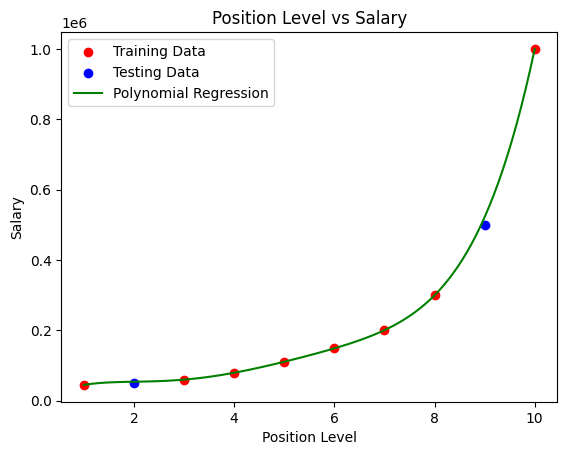

In [53]:
# Predict salaries using the trained model
X_plot = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Visualize the dataset and polynomial line
plt.scatter(X_train, y_train, color='red', label='Training Data')
plt.scatter(X_test, y_test, color='blue', label='Testing Data')
plt.plot(X_plot, y_plot, color='green', label='Polynomial Regression')
plt.title('Position Level vs Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [69]:
# Predict salaries for new values
new_years_of_experience = [11, 12, 13]  # Example new years of experience
new_X = np.array(new_years_of_experience).reshape(-1, 1)  # Reshape for compatibility with model
new_y_pred = model.predict(poly_features.transform(new_X))

# Print predicted salaries for new values
for years, salary in zip(new_years_of_experience, new_y_pred):
    print("Predicted salary for {} years of experience: ${:,.2f}".format(years, salary))


Predicted salary for 11 years of experience: $1,938,488.72
Predicted salary for 12 years of experience: $3,629,280.36
Predicted salary for 13 years of experience: $6,466,355.07
